In [58]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
x_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA Category 1901-2010.csv",index_col=0)
y_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Cluster Number 1901-2010.csv",index_col=0)
x_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA Category 2011-2022.csv",index_col=0)
y_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Cluster Number 2011-2022.csv",index_col=0)


In [5]:
# x_train=pd.concat([x_train,x_test])
# x_train.set_index(i for i in range(122))
#y_train=pd.concat([y_train,y_test])
# y_train=y_train.set_index(i for i in range(122))
# y_train
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1)

In [66]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred = model.predict(x_test)

In [69]:
y_pred

array([4, 2, 8, 4, 4, 4, 3, 4, 6, 6, 8, 8], dtype=int64)

In [70]:
y_array=y_test.values.ravel()
y_array

array([0, 4, 0, 6, 1, 3, 6, 3, 0, 4, 3, 8], dtype=int64)

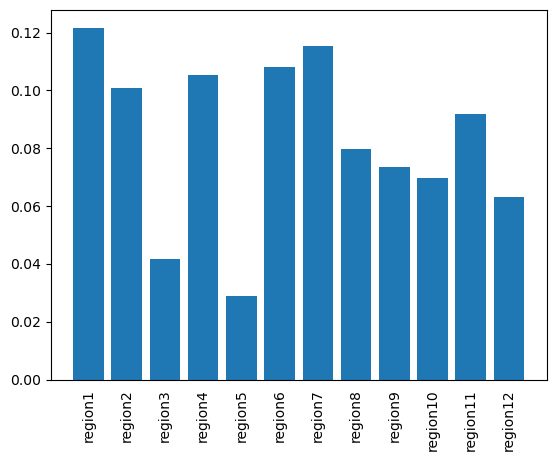

In [71]:
important_features = model.feature_importances_
plt.bar(range(len(important_features)),important_features)
plt.xticks(range(len(important_features)), x_train.columns, rotation=90)
plt.tick_params(axis='x', which='both', bottom=False, top=False)

In [72]:
clusters=[]
for i in range(1,10):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\IMD Rainfall Clusters Images\Cluster {i}.png"))
    

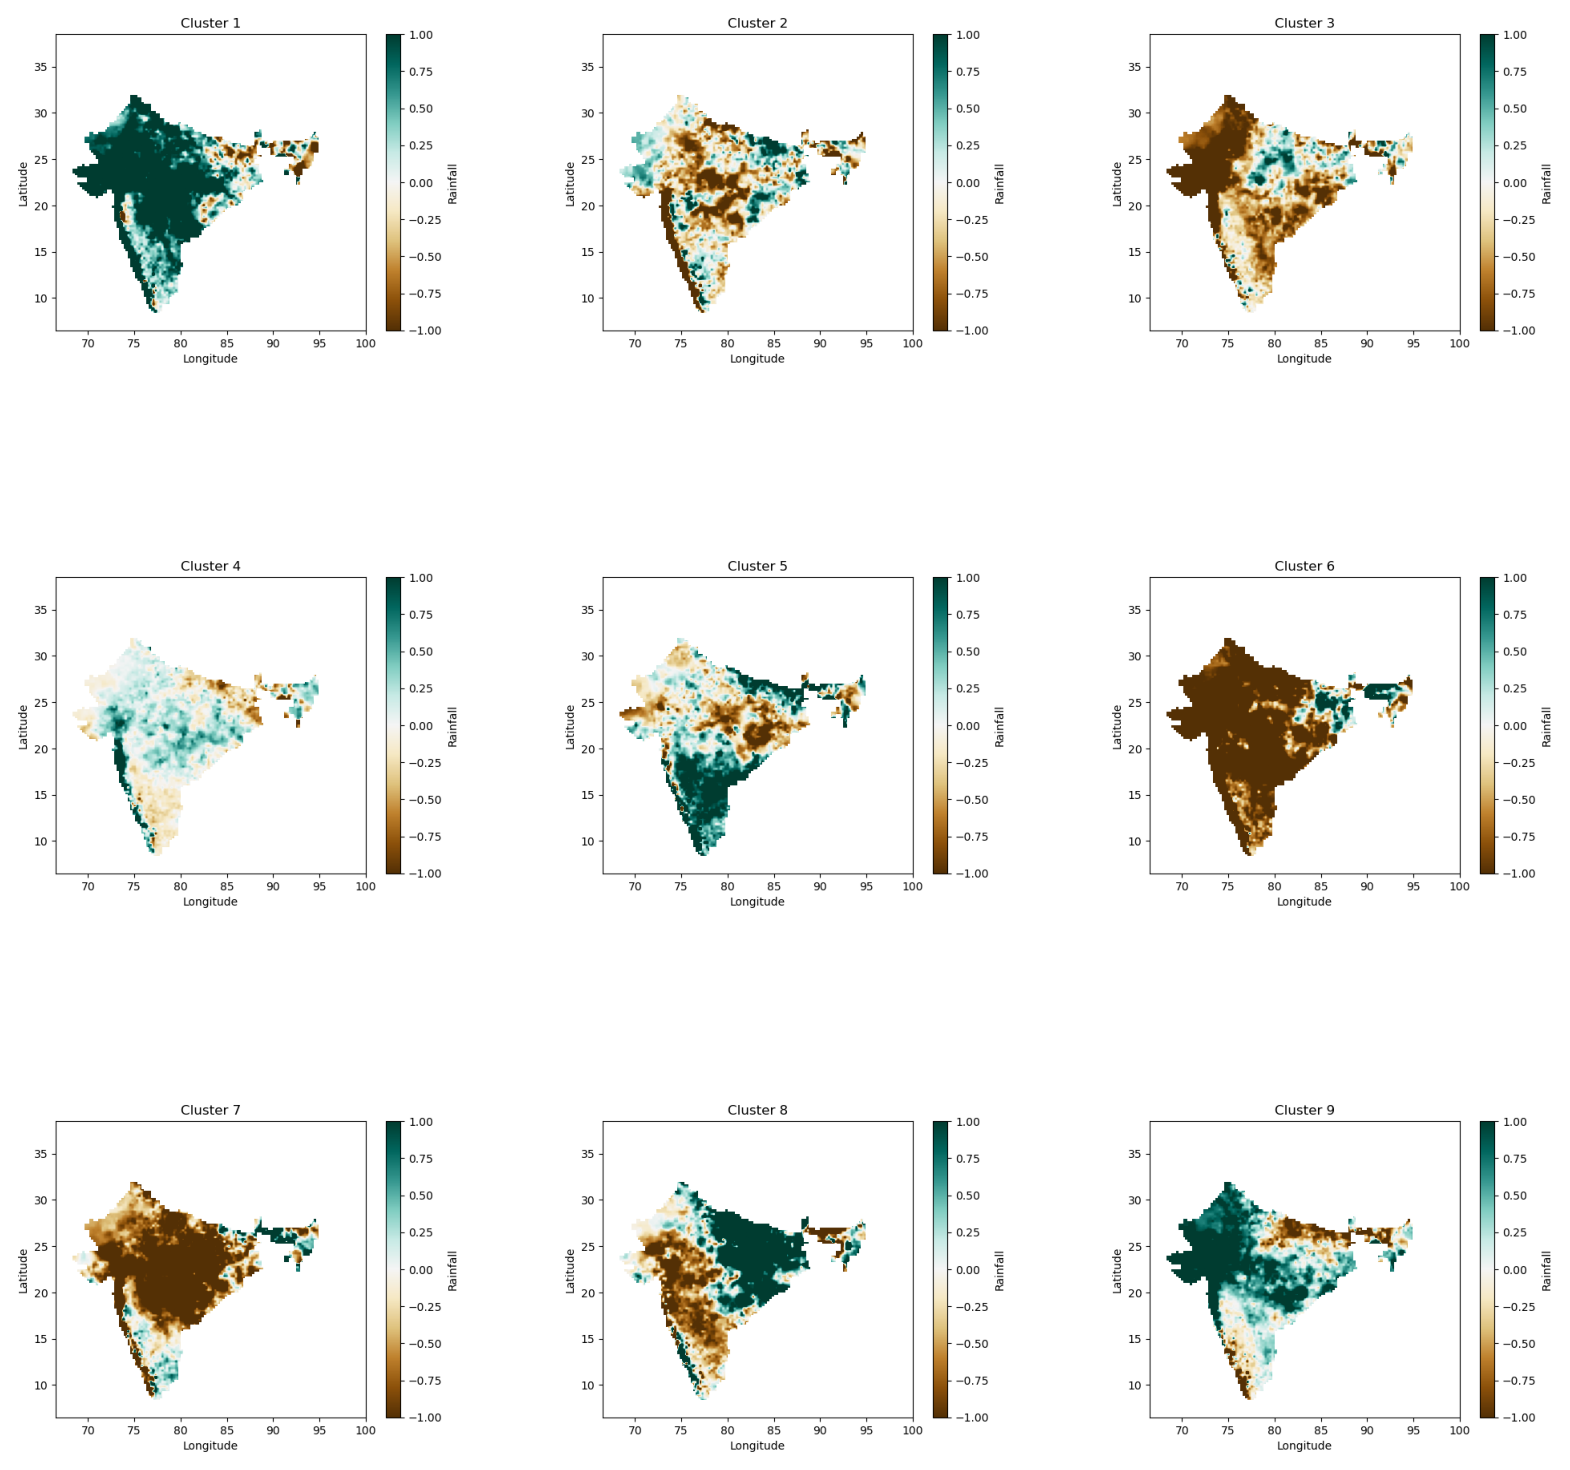

In [73]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off') 

In [74]:
actual_years_map=[]
year=2011
for i in range(12):
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{year} Rainfall.png"))
    year+=1
                        

In [89]:
y_train

Cluster Number
0                 2
1                 6
2                 4
3                 5
4                 1
..              ...
105               8
106               4
107               1
108               6
109               8

[110 rows x 1 columns]

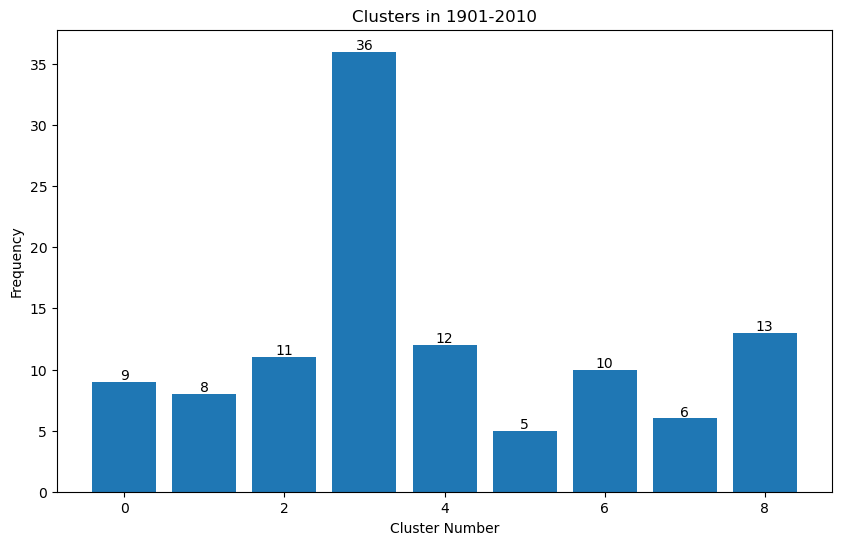

In [126]:
cluster_counts = y_train['Cluster Number'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars1=plt.bar(cluster_counts.index, cluster_counts.values)
plt.title("Clusters in 1901-2010")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars1, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
    
#plt.savefig('Clusters in 1901-2010.png')

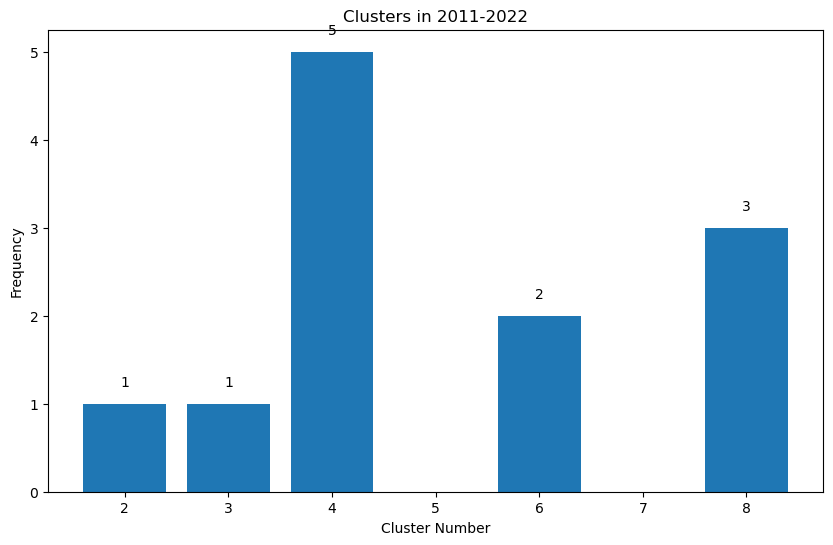

In [127]:
unique_values, value_counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(10, 6))  # Set the figure size
bars=plt.bar(unique_values, value_counts)
plt.title("Clusters in 2011-2022")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
#plt.savefig('Clusters in 2011-2022.png')


In [98]:
y_pred

array([4, 2, 8, 4, 4, 4, 3, 4, 6, 6, 8, 8], dtype=int64)

In [85]:
# fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
# j=0
# for i, ax in enumerate(axes.ravel()):
    
#     if((i+1)%2==0):
#         pred_clus=y_pred[j]
#         ax.imshow(clusters[pred_clus])
#         ax.axis('off')
#         ax.set_title(f'Predicted Cluster')
#         j+=1
#     elif((i+1)%2==1):
#         ax.imshow(actual_years_map[j])
#         ax.axis('off')
#         ax.set_title('Actual Anomaly')


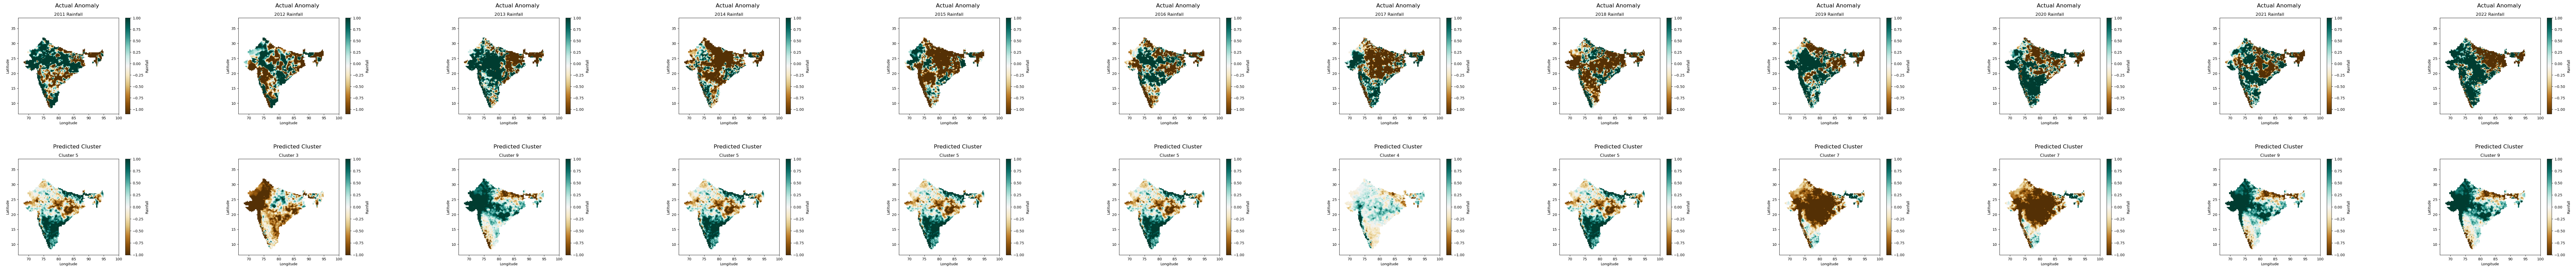

In [87]:
fig, axes = plt.subplots(2, 12, figsize=(100, 10)) 
j=0
k=0
for i, ax in enumerate(axes.ravel()):
    
    if(i>=12):
        pred_clus=y_pred[k]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        k+=1
    else:
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')
        j+=1

#plt.savefig('Prediction.png')


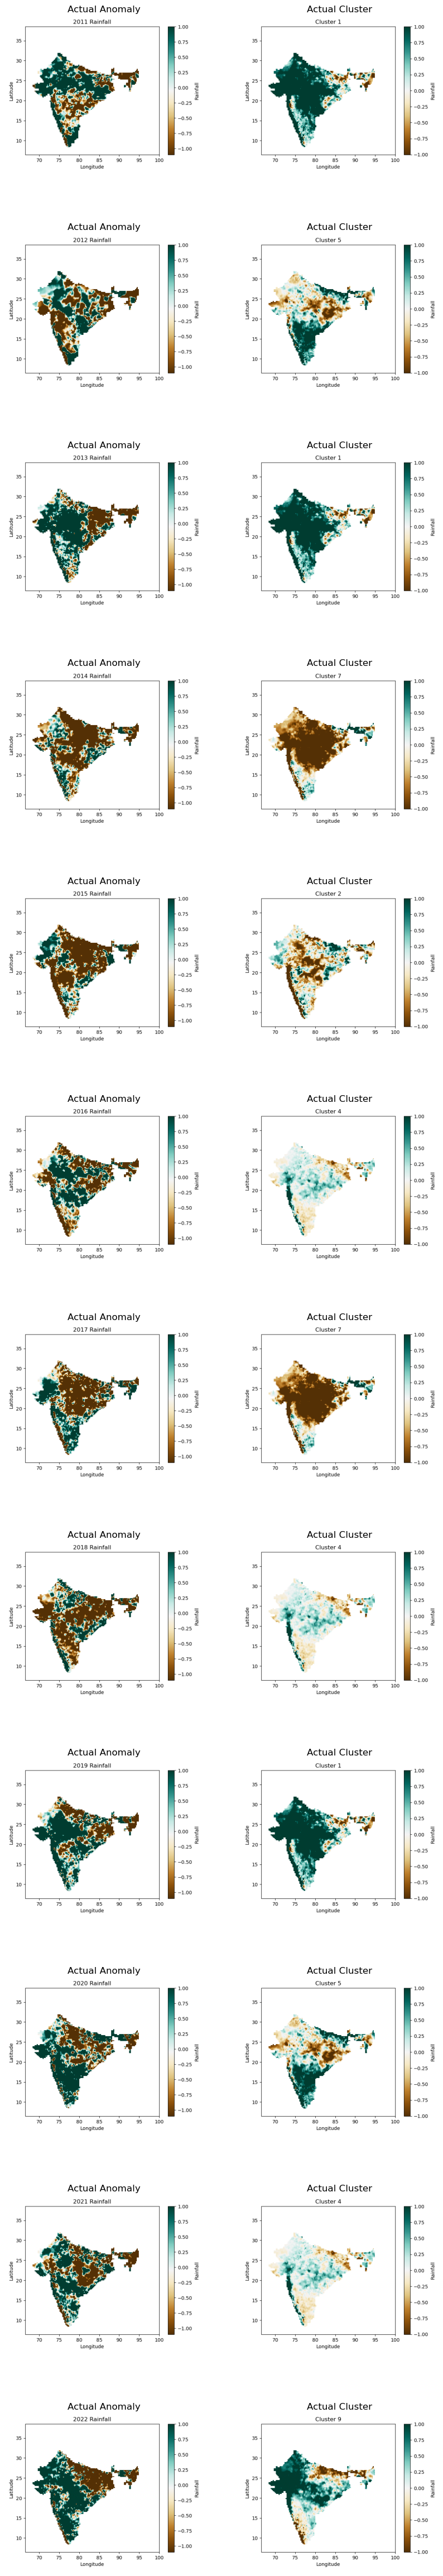

In [57]:
#Actual Years
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

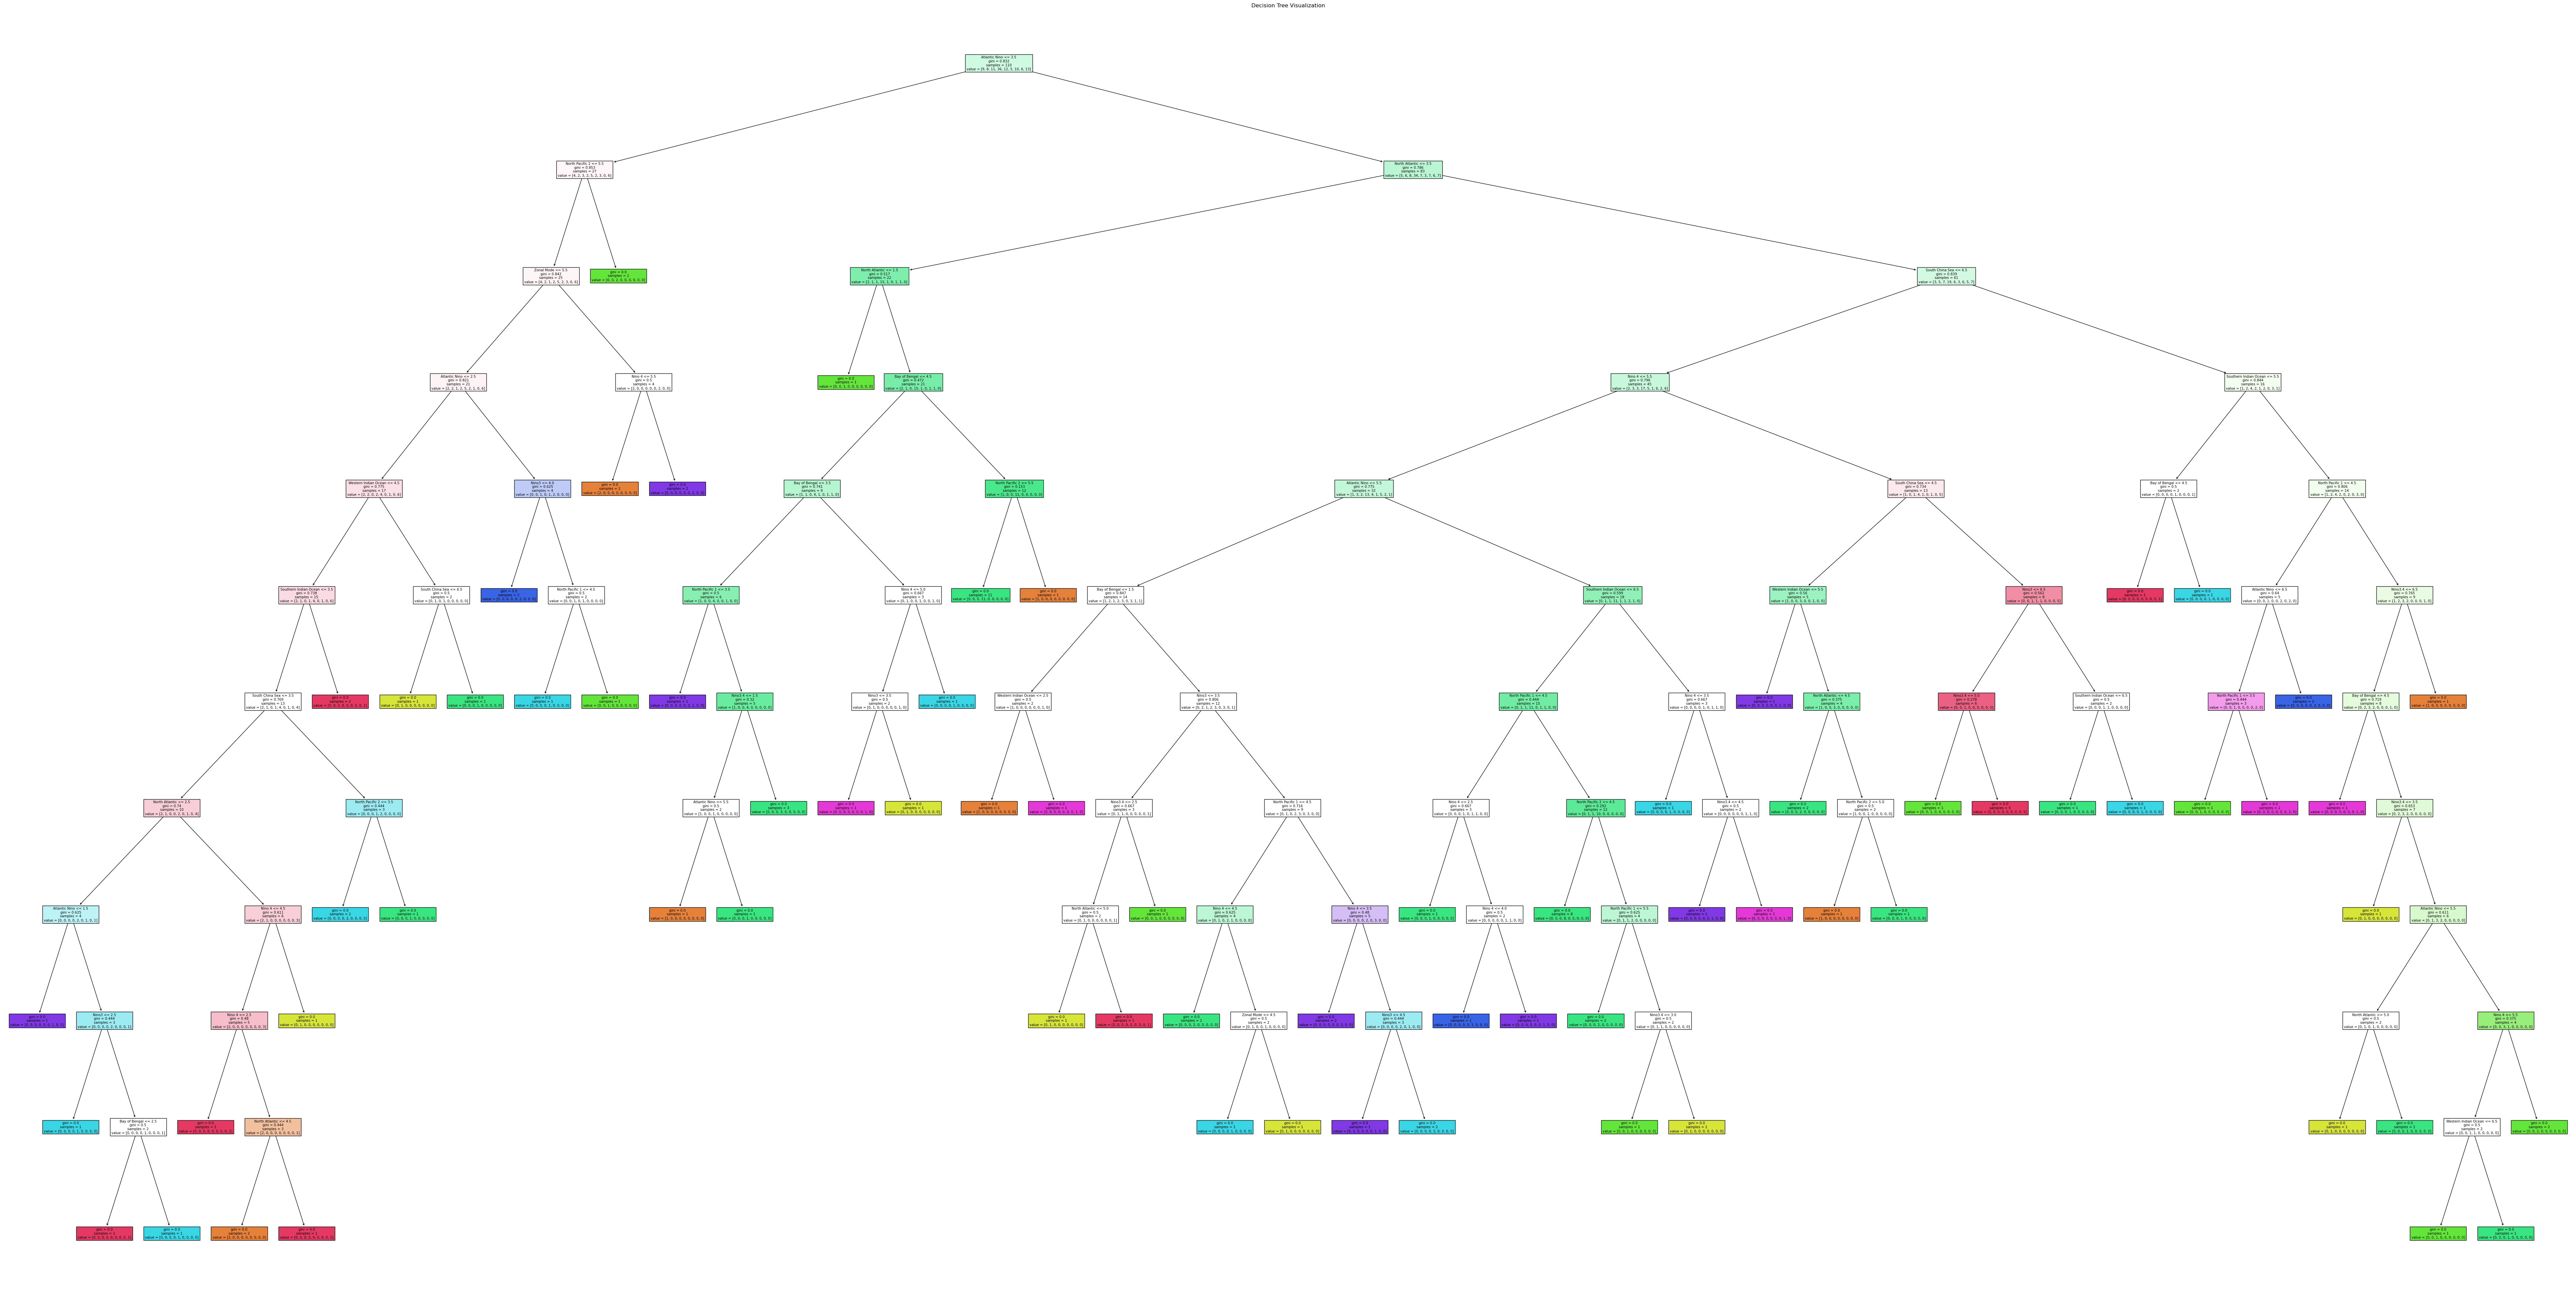

In [30]:
# Assuming you've already trained your Decision Tree classifier (clf)

cols=['Atlantic Nino', 'Bay of Bengal', 'Zonal Mode', 'Nino3', 'Nino3.4', 'Nino 4', 'North Atlantic', 'North Pacific 1', 'North Pacific 2', 'South China Sea', 'Southern Indian Ocean', 'Western Indian Ocean']


plt.figure(figsize=(100, 50))
tree.plot_tree(model, filled=True, feature_names=cols)
plt.title("Decision Tree Visualization")
#plt.savefig(f'CART.png', dpi=100, bbox_inches='tight')

plt.show()


In [3]:
x_train

region1  region2  region3  region4  region5  region6  region7  region8  \
0          6        7        6        6        5        4        5        5   
1          7        7        7        3        3        4        6        6   
2          7        6        7        5        4        3        7        6   
3          7        7        7        6        6        6        6        4   
4          7        7        7        2        2        4        6        7   
..       ...      ...      ...      ...      ...      ...      ...      ...   
105        2        1        2        4        4        4        2        4   
106        3        4        1        5        4        2        2        4   
107        2        3        5        5        6        6        1        3   
108        1        1        1        4        4        4        2        2   
109        1        1        1        3        2        2        4        3   

     region9  region10  region11  region12  
0          4         7         6         6  
1          5         6         7         7  
2          6         4         7         7  
3          7         7         7         7  
4          6         7         7         7  
..       ...       ...       ...       ...  
105        4         2         2         2  
106        5         3         1         1  
107        5         6         4         5  
108        4         2         1         2  
109        4         1         1         1  

[110 rows x 12 columns]

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
x_train_mean = x_train.mean(axis=1)
x_train_mean

0      5.583333
1      5.666667
2      5.750000
3      6.416667
4      5.750000
5      5.583333
6      5.750000
7      6.416667
8      6.250000
9      6.333333
10     6.583333
11     4.916667
12     6.250000
13     5.083333
14     4.250000
15     5.750000
16     6.250000
17     6.000000
18     5.250000
19     4.750000
20     5.666667
21     5.916667
22     5.416667
23     4.916667
24     6.083333
25     4.000000
26     5.833333
27     5.416667
28     5.833333
29     5.166667
30     3.583333
31     5.416667
32     5.666667
33     5.500000
34     5.666667
35     5.333333
36     4.833333
37     5.416667
38     5.833333
39     4.250000
40     2.750000
41     4.250000
42     5.583333
43     3.833333
44     4.083333
45     4.666667
46     4.750000
47     5.416667
48     5.333333
49     5.333333
50     4.916667
51     3.833333
52     3.833333
53     5.083333
54     5.750000
55     5.416667
56     4.166667
57     4.000000
58     4.416667
59     4.500000
60     4.250000
61     4.666667
62     4

In [33]:
x_test_mean=x_test.mean(axis=1)
x_test_mean

0     3.750000
1     3.416667
2     2.583333
3     2.333333
4     1.416667
5     1.583333
6     2.000000
7     2.250000
8     1.500000
9     1.583333
10    2.833333
11    2.666667
dtype: float64